In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import plotly.offline as pyoff
import plotly.graph_objs as go

In [3]:
import plotly.graph_objs as go

In [5]:
fake = pd.read_csv('./Fake.csv')
real = pd.read_csv('./True.csv')

In [6]:
fake['Target']=1
real['Target']=0

In [7]:
frames = [fake, real]

df = pd.concat(frames)

In [8]:
len(df)

44898

In [9]:
df = df.sample(frac=1).reset_index(drop=True)

In [10]:
pip install -U sentence-transformers

     |████████████████████████████████| 78 kB 2.9 MB/s 
     |████████████████████████████████| 3.1 MB 12.0 MB/s 
     |████████████████████████████████| 3.3 MB 41.3 MB/s 
     |████████████████████████████████| 1.2 MB 22.9 MB/s 
     |████████████████████████████████| 61 kB 399 kB/s 
     |████████████████████████████████| 895 kB 55.1 MB/s 
     |████████████████████████████████| 596 kB 50.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=b1f8445c6d40f4f349561e6ac83695b65cc41a972bc3518531c794507150e1f8
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [11]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [12]:
sentences = df['text'].to_numpy()
y_train = df['Target'].to_numpy()

In [13]:
sentences[:1]

array([' (This version of the story from 8th October has been refiled to fix a typo in the headline) MOSCOW (Reuters) - Russian firefighters on Sunday used specially equipped helicopters to dump water on a construction goods market on the northwestern edge of Moscow that caught fire. The fire at the market sent a thick cloud of gray smoke billowing into the air, footage broadcast on Russian television showed. The fire was causing tailbacks on the nearby Moscow orbital highway, according to live traffic data.  Three thousand shoppers and staff have been evacuated from the market, Russian media quoted emergency services officials as saying. There were no reports of any casualties. '],
      dtype=object)

In [14]:
sentence_embeddings = model.encode(sentences)

In [15]:
len(sentence_embeddings)

44898

In [16]:
sentence_embeddings[:1]

array([[ 1.25476730e-03,  1.02493040e-01, -1.24937082e-02,
         3.90218049e-02,  9.27479416e-02, -1.12639843e-02,
         6.75558150e-02, -2.27386924e-03, -5.51130623e-02,
         4.44389135e-03, -3.92336119e-03,  6.96416497e-02,
        -4.79524955e-03,  7.86169395e-02, -2.86185537e-02,
        -6.16985224e-02, -2.23051030e-02, -1.84880756e-02,
        -7.14753047e-02, -1.58758778e-02, -5.23636714e-02,
        -1.89030319e-02,  6.86726049e-02,  4.78585847e-02,
         4.87508513e-02,  7.68849105e-02, -2.03706771e-02,
         5.44656031e-02,  1.02678407e-02,  4.33361949e-03,
         7.43909925e-02, -1.51718566e-02, -1.27992732e-02,
         2.29524001e-02,  7.99109116e-02, -2.62711048e-02,
         1.41397992e-04, -1.64790489e-02,  2.06505451e-02,
         8.51804018e-02,  6.89014941e-02, -6.97554797e-02,
        -3.19354460e-02, -2.92282831e-02, -8.94470513e-03,
         3.21109816e-02, -1.81603674e-02, -8.64383876e-02,
         9.67141315e-02,  2.82178055e-02,  6.34977594e-0

In [18]:
from __future__ import division, print_function
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [19]:
model_new = Sequential()
model_new.add(Dense(128, activation = 'relu'))
model_new.add(Dense(1, activation = 'softmax'))

In [20]:
model_new.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [24]:
num_epochs = 30
batch_size = 1000

In [25]:
history = model_new.fit(sentence_embeddings, y_train, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

Epoch 1/30
41/41 [==============================] - 0s 12ms/step - loss: 2.2100e-04 - acc: 0.5229 - val_loss: 0.0913 - val_acc: 0.5238
Epoch 2/30
41/41 [==============================] - 0s 11ms/step - loss: 2.1070e-04 - acc: 0.5229 - val_loss: 0.0913 - val_acc: 0.5238
Epoch 3/30
41/41 [==============================] - 0s 10ms/step - loss: 2.0239e-04 - acc: 0.5229 - val_loss: 0.0912 - val_acc: 0.5238
Epoch 4/30
41/41 [==============================] - 0s 9ms/step - loss: 1.9525e-04 - acc: 0.5229 - val_loss: 0.0912 - val_acc: 0.5238
Epoch 5/30
41/41 [==============================] - 0s 9ms/step - loss: 1.9069e-04 - acc: 0.5229 - val_loss: 0.0912 - val_acc: 0.5238
Epoch 6/30
41/41 [==============================] - 0s 8ms/step - loss: 1.8807e-04 - acc: 0.5229 - val_loss: 0.0912 - val_acc: 0.5238
Epoch 7/30
41/41 [==============================] - 0s 9ms/step - loss: 1.8601e-04 - acc: 0.5229 - val_loss: 0.0911 - val_acc: 0.5238
Epoch 8/30
41/41 [==============================] - 0s 9ms/

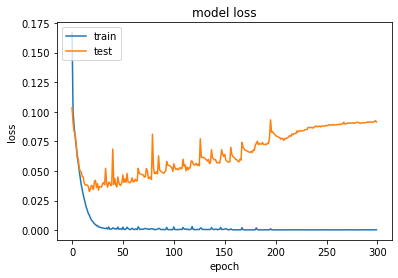

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()